In [2]:

import numpy as np
import pandas as pd
from skimage.io import imread
from matplotlib import pyplot as plt
from galaxyteam.dataset import resize_image
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier





## KNN

K-Nearest Neighbours (k-NN) is a supervised machine learning algorithm. It can be used for classification and regression. Since ours is a classification problem, the output is a  is a class membership. The data is being assigned to the class most common among its k nearest neighbors.

The k-NN algorithm is one of the simplest of the machine learning algorithms. The model only consists of the training data, that is, the model simply learns the entire training set and for prediction gives the output as the class with the majority in the ‘k’ nearest neighbours calculated according to some distance metric.

<center>
<img src="knn.png"/>
</center>


Example of k-NN classification. The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

Reference: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [3]:
train_info_file_path='./data/preprocessed/train_metadata.csv'

full_train = pd.read_csv(train_info_file_path)

train_data, val_data = train_test_split(full_train, 
test_size=0.2,
shuffle=True,
stratify=full_train.is_pneumonia,
random_state=9473)


In [4]:
test_info_file_path='./data/preprocessed/test_metadata.csv'

test_data = pd.read_csv(test_info_file_path)



We read all images in the data/train directory, and convert the images into grayscale.

In [6]:

X_train = [imread(path,as_gray=True) for path in train_data.resized_file_path]
Y_train = np.array([pnu for pnu in train_data.is_pneumonia])
X_val = [imread(path,as_gray=True) for path in val_data.resized_file_path]
Y_val = np.array([pnu for pnu in val_data.is_pneumonia])
X_test = [imread(path,as_gray=True) for path in test_data.resized_file_path]
Y_test = np.array([pnu for pnu in test_data.is_pneumonia])


In [7]:
print("X_train: "+str(np.shape(X_train)))
print("X_test: "+str(np.shape((X_test))))
print("X_val: "+str(np.shape(X_val)))
print("Y_train: "+str(np.shape(Y_train)))
print("Y_test: "+str(np.shape(Y_test)))
print("Y_val: "+str(np.shape(Y_val)))

X_train: (3748, 224, 224)
X_test: (1171, 224, 224)
X_val: (937, 224, 224)
Y_train: (3748,)
Y_test: (1171,)
Y_val: (937,)


In [8]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (np.shape(X_train)[0], -1))
X_test = np.reshape(X_test, (np.shape(X_test)[0], -1))
X_val = np.reshape(X_val, (np.shape(X_val)[0], -1))

print("X_train: "+str(np.shape(X_train)))
print("X_test: "+str(np.shape(X_test)))
print("X_val: "+str(np.shape(X_val)))

X_train: (3748, 50176)
X_test: (1171, 50176)
X_val: (937, 50176)


## Finding the best ‘k’

Now, we will run a loop to find the best k values starting from 1 to 50 based on the F1-score of the validation set.

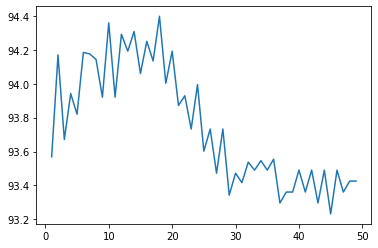

max F1 at k=18 F1-Score of 94.39775910364145


In [9]:
lix = []
liy = []
index=0
f1=0

for k in range(1, 50):
   model = KNeighborsClassifier(n_neighbors=k)
   model.fit(X_train,Y_train)
   Y_val_pred = model.predict(X_val) 
   cm = confusion_matrix(Y_val, Y_val_pred)
   tn, fp, fn, tp = cm.ravel()
   precision = tp/(tp+fp)*100
   recall = tp/(tp+fn)*100
   liy.append(2*precision*recall/(precision+recall))
   if liy[k-1]>f1:
      f1=liy[k-1]
      index=k-1
   lix.append(k)

plt.plot(lix, liy)
plt.show()
print("max F1 at k="+str(index+1)+" F1-Score of "+str(f1)) 

## Finding Test Accuracy for best 'k'

The  F1- score was best for k=18, so we will now fix k=18 and find the F1-score on the test data.

CONFUSION MATRIX


<Figure size 432x288 with 0 Axes>

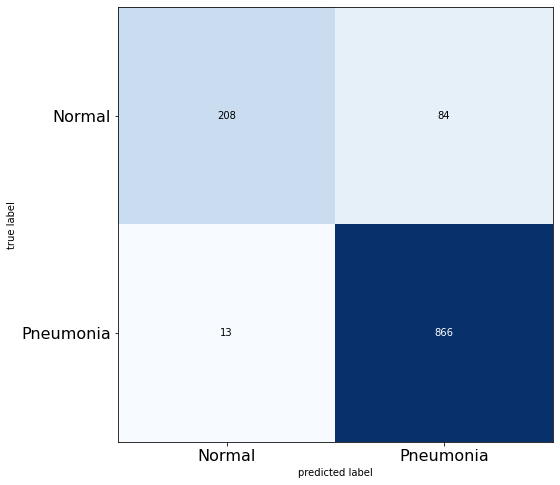


TESTING METRICS for k=18
Accuracy: 0.9171648163962425%
Precision: 91.15789473684211%
F1-score: 94.6965554948059
Recall: 98.52104664391354%


In [10]:
model = KNeighborsClassifier(n_neighbors=18)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test) 
cm = confusion_matrix(Y_test, Y_pred)
tn, fp, fn, tp = cm.ravel()


print('CONFUSION MATRIX')
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

print('\nTESTING METRICS for k=18')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
acc = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))
print('Recall: {}%'.format(recall))

